In [1]:
fname = "photographe-paysage.jpg"

In [2]:
!git clone https://github.com/DmitryUlyanov/deep-image-prior
!mv deep-image-prior/* ./

Cloning into 'deep-image-prior'...
remote: Enumerating objects: 289, done.
remote: Total 289 (delta 0), reused 0 (delta 0), pack-reused 289
Receiving objects: 100% (289/289), 24.28 MiB | 31.24 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from utils.denoising_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

In [5]:
imsize =-1
PLOT = True
sigma = 25
sigma_ = sigma/255.

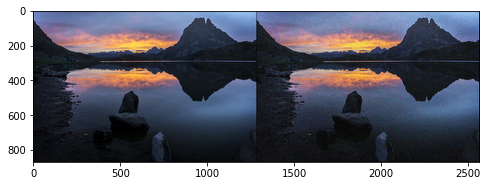

In [44]:
img_pil = crop_image(get_image(fname, imsize)[0], d=32)
img_np = pil_to_np(img_pil)

img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_)

if PLOT:
    plot_image_grid([img_np, img_noisy_np], 4, 6);

In [51]:
x_mid = int(img_np.shape[1]/2)
print(x_mid)
y_mid = int(img_np.shape[2]/2)
print(y_mid)

432
640


In [53]:
img_list = []

for i in range(2):
  for j in range(2):
    img_list.append(img_noisy_np[:,i*x_mid:(i+1)*x_mid,i*y_mid:(i+1)*y_mid])

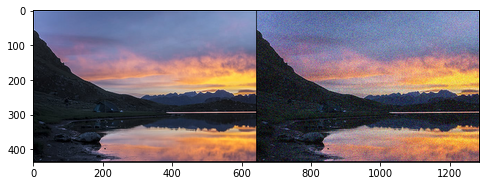

In [47]:
plot_image_grid([img_np[:,0:x_mid,0:y_mid], img_noisy_np[:,0:x_mid,0:y_mid]], 4, 6);

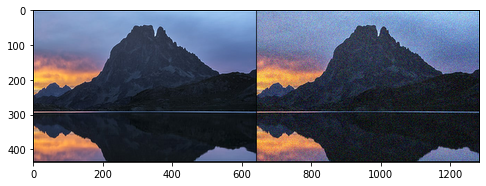

In [48]:
plot_image_grid([img_np[:,0:x_mid,y_mid:-1], img_noisy_np[:,0:x_mid,y_mid:-1]], 4, 6);

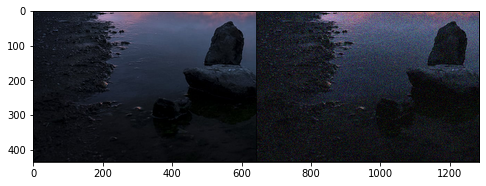

In [49]:
plot_image_grid([img_np[:,x_mid:-1,0:y_mid], img_noisy_np[:,x_mid:-1,0:y_mid]], 4, 6);

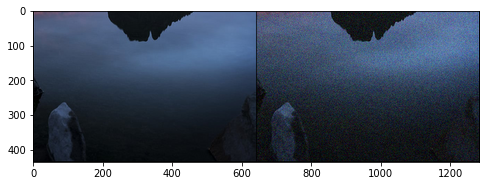

In [50]:
plot_image_grid([img_np[:,x_mid:-1,y_mid:-1], img_noisy_np[:,x_mid:-1,y_mid:-1]], 4, 6);

In [39]:
img = plt.imread(fname)
img_np = np.array(img)

In [43]:
img_np.transpose()

array([[[0.53333333, 0.61960784, 0.84705882],
        [0.50588235, 0.59215686, 0.81960784],
        [0.50196078, 0.58823529, 0.81568627],
        ...,
        [0.54901961, 0.70980392, 0.89019608],
        [0.54901961, 0.70980392, 0.89019608],
        [0.55294118, 0.71372549, 0.89411765]],

       [[0.49019608, 0.57647059, 0.80392157],
        [0.4627451 , 0.54901961, 0.77647059],
        [0.46666667, 0.55294118, 0.78039216],
        ...,
        [0.54901961, 0.70980392, 0.89019608],
        [0.54901961, 0.70980392, 0.89019608],
        [0.54901961, 0.70980392, 0.89019608]],

       [[0.4745098 , 0.56078431, 0.78823529],
        [0.45098039, 0.5372549 , 0.76470588],
        [0.45490196, 0.54117647, 0.76862745],
        ...,
        [0.54901961, 0.70980392, 0.89019608],
        [0.54901961, 0.70980392, 0.89019608],
        [0.54901961, 0.70980392, 0.89019608]],

       ...,

       [[0.06666667, 0.07058824, 0.08627451],
        [0.03921569, 0.04313725, 0.05882353],
        [0.03529412, 0

In [40]:
x_mid = int(img_np.shape[0]/2)
y_mid = int(img_np.shape[1]/2)

In [33]:
img_np.shape

(867, 1300, 3)

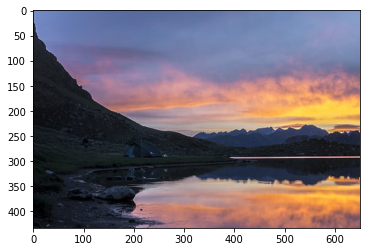

In [41]:
plt.imshow(img_np[0:x_mid,0:y_mid])